In [28]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Modelado y forecasting
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.utils import save_forecaster
from skforecast.utils import load_forecaster

# Configuracion de Warnnings
import warnings

# Gráficos
import matplotlib.pyplot as plt  # graficos libres
import matplotlib.pyplot as plt2  # five

plt2.style.use('fivethirtyeight')
plt2.rcParams['lines.linewidth'] = 1.5
plt2.rcParams['font.size'] = 10

In [29]:
ruta = "../../results/WHCd_Juarez_clean_v1.csv"
cdjuarezML = pd.read_csv(ruta)
cdjuarezML.head()

,tiempo_americano,time_num_usa,viento_U,viento_V,pto_rocio,tem_viento,alt_nube,evaporacion,rafaga_viento,evap_media,...,pm_nivel_del_mar,evap_potencial,tip_precipitacion,temp_del_suelo,agua_del_suelo,nubosidad,precip_acum_x_hora,angulo_viento,dir_viento,vel_viento
0,1/1/2000,36526,-1.669281,-0.020920,7.480493,17.317834,1907.450439,-7.220000e-06,2.148321,-2.000000e-06,...,1012.635625,-1.250000e-05,0,13.064264,0.137127,0.152496,0.0,89,este,1.669412
1,1/1/2000,36526,-1.951294,-0.468689,8.055566,16.767297,2135.849121,-1.550000e-06,2.747254,-4.300000e-07,...,1012.456250,-6.860000e-07,0,12.453210,0.137084,0.236725,0.0,76,este,2.006793
2,1/1/2000,36526,-1.763443,-0.294388,5.953119,14.243799,2208.853027,-4.540000e-07,2.561296,-1.230000e-07,...,1012.368125,6.660000e-07,0,10.392664,0.137066,0.579987,0.0,81,este,1.787847
3,1/1/2000,36526,-1.436081,0.382751,5.892938,11.471796,7484.599609,3.110000e-07,2.200583,8.660000e-08,...,1012.543125,1.220000e-06,0,8.273584,0.137028,0.482239,0.0,105,este,1.486212
4,1/1/2000,36526,-0.908798,1.725983,5.761438,11.316980,4100.225235,6.010000e-07,2.526732,1.660000e-07,...,1012.673750,1.130000e-06,0,7.544336,0.137005,0.411499,0.0,152,sureste,1.950623


# Preparación de los datos


In [30]:
cdjuarezML = cdjuarezML.drop(['dir_viento','time_num_usa'], axis=1)
#cdjuarezML['ti']

In [31]:
cdjuarezML.head()

,tiempo_americano,viento_U,viento_V,pto_rocio,tem_viento,alt_nube,evaporacion,rafaga_viento,evap_media,evap_media_potencial,pm_nivel_del_mar,evap_potencial,tip_precipitacion,temp_del_suelo,agua_del_suelo,nubosidad,precip_acum_x_hora,angulo_viento,vel_viento
0,1/1/2000,-1.669281,-0.020920,7.480493,17.317834,1907.450439,-7.220000e-06,2.148321,-2.000000e-06,-3.470000e-06,1012.635625,-1.250000e-05,0,13.064264,0.137127,0.152496,0.0,89,1.669412
1,1/1/2000,-1.951294,-0.468689,8.055566,16.767297,2135.849121,-1.550000e-06,2.747254,-4.300000e-07,-1.910000e-07,1012.456250,-6.860000e-07,0,12.453210,0.137084,0.236725,0.0,76,2.006793
2,1/1/2000,-1.763443,-0.294388,5.953119,14.243799,2208.853027,-4.540000e-07,2.561296,-1.230000e-07,1.860000e-07,1012.368125,6.660000e-07,0,10.392664,0.137066,0.579987,0.0,81,1.787847
3,1/1/2000,-1.436081,0.382751,5.892938,11.471796,7484.599609,3.110000e-07,2.200583,8.660000e-08,3.350000e-07,1012.543125,1.220000e-06,0,8.273584,0.137028,0.482239,0.0,105,1.486212
4,1/1/2000,-0.908798,1.725983,5.761438,11.316980,4100.225235,6.010000e-07,2.526732,1.660000e-07,3.180000e-07,1012.673750,1.130000e-06,0,7.544336,0.137005,0.411499,0.0,152,1.950623


In [32]:
'''cdjuarezML=cdjuarezML.set_index('tiempo_americano')
cdjuarezML=cdjuarezML.rename(columns={'x': 'y'})
#cdjuarezML=cdjuarezML.asfreq('D')
cdjuarezML=cdjuarezML.sort_index()
cdjuarezML.head()'''

"cdjuarezML=cdjuarezML.set_index('tiempo_americano')\ncdjuarezML=cdjuarezML.rename(columns={'x': 'y'})\n#cdjuarezML=cdjuarezML.asfreq('D')\ncdjuarezML=cdjuarezML.sort_index()\ncdjuarezML.head()"

In [33]:
'''(cdjuarezML.index == pd.date_range(
    start=cdjuarezML.index.min(),
    end=cdjuarezML.index.max())
 ).all()'''

'(cdjuarezML.index == pd.date_range(\n    start=cdjuarezML.index.min(),\n    end=cdjuarezML.index.max())\n ).all()'

In [34]:
'''steps = 3650
datos_entrenamiento = cdjuarezML[:-steps]
datos_test = cdjuarezML[-steps:]'''

'steps = 3650\ndatos_entrenamiento = cdjuarezML[:-steps]\ndatos_test = cdjuarezML[-steps:]'

In [35]:
'''steps = 365
datos_entrenamiento = cdjuarezML[:-steps]
datos_test = cdjuarezML[-steps:]

print(f"Fechas de entrenamiento:{datos_entrenamiento.index.min()} --- {datos_entrenamiento.index.max()} (n={len(datos_entrenamiento)})")
print(f"Fechas test: {datos_test.index.min()} --- {datos_test.index.max()} (n={len(datos_test)})")

fig, ax = plt2.subplots(figsize=(19.20, 10.80))
datos_entrenamiento['viento_U'].plot(ax=ax, label='Entrenamiento')
datos_test['viento_U'].plot(ax=ax, label='Test')
ax.legend()'''

'steps = 365\ndatos_entrenamiento = cdjuarezML[:-steps]\ndatos_test = cdjuarezML[-steps:]\n\nprint(f"Fechas de entrenamiento:{datos_entrenamiento.index.min()} --- {datos_entrenamiento.index.max()} (n={len(datos_entrenamiento)})")\nprint(f"Fechas test: {datos_test.index.min()} --- {datos_test.index.max()} (n={len(datos_test)})")\n\nfig, ax = plt2.subplots(figsize=(19.20, 10.80))\ndatos_entrenamiento[\'viento_U\'].plot(ax=ax, label=\'Entrenamiento\')\ndatos_test[\'viento_U\'].plot(ax=ax, label=\'Test\')\nax.legend()'

# Forecasting autoregresivo recursivo

In [36]:
'''forecaster = ForecasterAutoreg(
    regressor=RandomForestRegressor(random_state=123),
    lags=6
)

forecaster.fit(y=datos_entrenamiento['viento_U'])
forecaster
print("STATUS: BR")'''

'forecaster = ForecasterAutoreg(\n    regressor=RandomForestRegressor(random_state=123),\n    lags=6\n)\n\nforecaster.fit(y=datos_entrenamiento[\'viento_U\'])\nforecaster\nprint("STATUS: BR")'

In [37]:
cdjuarezML.isna().sum()

tiempo_americano        0
viento_U                0
viento_V                0
pto_rocio               0
tem_viento              0
alt_nube                0
evaporacion             0
rafaga_viento           0
evap_media              0
evap_media_potencial    0
pm_nivel_del_mar        0
evap_potencial          0
tip_precipitacion       0
temp_del_suelo          0
agua_del_suelo          0
nubosidad               0
precip_acum_x_hora      0
angulo_viento           0
vel_viento              0
dtype: int64

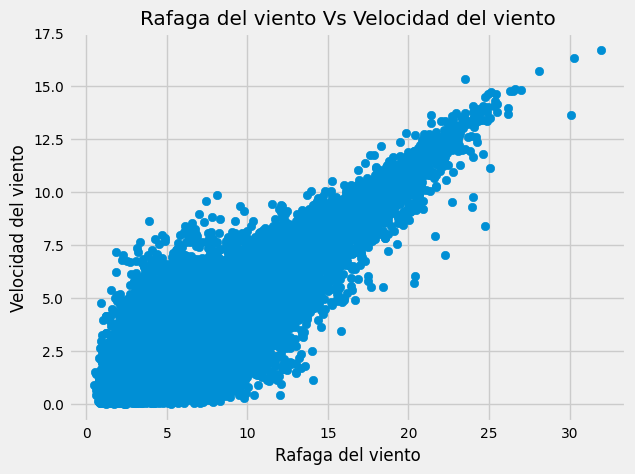

In [38]:
plt.scatter(x=cdjuarezML['rafaga_viento'], y=cdjuarezML['vel_viento'])
plt.title('Rafaga del viento Vs Velocidad del viento')
plt.xlabel('Rafaga del viento')
plt.ylabel('Velocidad del viento')
plt.show()

# Entrenamiento del modelo


In [39]:
datos_entrenamiento = cdjuarezML.sample(frac=0.8, random_state=0)
datos_test = cdjuarezML.drop(datos_entrenamiento.index)

datos_entrenamiento

,tiempo_americano,viento_U,viento_V,pto_rocio,tem_viento,alt_nube,evaporacion,rafaga_viento,evap_media,evap_media_potencial,pm_nivel_del_mar,evap_potencial,tip_precipitacion,temp_del_suelo,agua_del_suelo,nubosidad,precip_acum_x_hora,angulo_viento,vel_viento
37896,4/28/2004,-3.534210,2.340012,-2.331946,23.692346,5208.393555,-3.540000e-06,9.194188,-9.760000e-07,-0.000125,1013.154375,-0.000451,0,29.548730,0.022686,0.974762,0.000000,124,4.238667
74250,6/20/2008,-5.925171,0.034805,11.053552,30.010889,4100.225235,-7.100000e-06,10.899548,-1.970000e-06,-0.000206,1014.740625,-0.000742,0,36.602014,0.015940,0.001892,0.000000,90,5.925273
59757,10/25/2006,4.835846,1.121628,12.362146,21.528986,1352.343384,-2.028860e-04,9.522625,-5.640000e-05,-0.000102,1011.158125,-0.000366,1,21.420557,0.110263,0.355682,0.004768,257,4.964217
177466,3/30/2020,3.383179,1.269394,-4.266638,12.127374,9131.368164,-7.670000e-06,6.438713,-2.130000e-06,-0.000004,1012.865000,-0.000013,0,10.157190,0.039522,0.995239,0.000000,249,3.613483
205705,6/20/2023,5.585907,0.587860,3.599084,36.665857,5312.554199,-6.410000e-06,9.760191,-1.780000e-06,-0.000158,1006.946250,-0.000567,0,41.359094,0.007525,1.000000,0.000000,264,5.616755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191385,10/31/2021,2.427872,0.937912,-1.125983,15.394098,4100.225235,-4.660000e-07,4.806117,-1.330000e-07,-0.000003,1012.696875,-0.000009,0,14.108057,0.027446,0.000000,0.000000,249,2.602737
99082,4/21/2011,2.204514,1.140381,-5.350195,15.691919,8317.408203,-5.670000e-07,5.565125,-1.560000e-07,-0.000006,1009.915000,-0.000022,0,15.720239,0.016287,0.405151,0.000000,243,2.482005
161997,6/24/2018,7.855988,-1.026810,6.496790,36.706750,4100.225235,-1.090000e-05,14.948842,-3.030000e-06,-0.000268,1005.112500,-0.000966,0,44.203241,0.020855,0.005249,0.000000,277,7.922807
193632,2/2/2022,3.478302,1.052429,-7.944678,16.525232,3375.863281,-9.230000e-06,7.654892,-2.560000e-06,-0.000058,1005.415000,-0.000208,0,17.690393,0.027882,0.928894,0.000000,253,3.634032


In [45]:
etiquetas_entranamiento = datos_entrenamiento.pop('viento_V')
etiquetas_test = datos_test.pop('tiempo_americano')

etiquetas_entranamiento

37896     2.340012
74250     0.034805
59757     1.121628
177466    1.269394
205705    0.587860
            ...   
191385    0.937912
99082     1.140381
161997   -1.026810
193632    1.052429
170293   -1.128815
Name: viento_V, Length: 167539, dtype: float64

In [41]:
datos_entrenamiento

,tiempo_americano,viento_U,viento_V,pto_rocio,tem_viento,alt_nube,evaporacion,rafaga_viento,evap_media,evap_media_potencial,pm_nivel_del_mar,evap_potencial,tip_precipitacion,agua_del_suelo,nubosidad,precip_acum_x_hora,angulo_viento,vel_viento
37896,4/28/2004,-3.534210,2.340012,-2.331946,23.692346,5208.393555,-3.540000e-06,9.194188,-9.760000e-07,-0.000125,1013.154375,-0.000451,0,0.022686,0.974762,0.000000,124,4.238667
74250,6/20/2008,-5.925171,0.034805,11.053552,30.010889,4100.225235,-7.100000e-06,10.899548,-1.970000e-06,-0.000206,1014.740625,-0.000742,0,0.015940,0.001892,0.000000,90,5.925273
59757,10/25/2006,4.835846,1.121628,12.362146,21.528986,1352.343384,-2.028860e-04,9.522625,-5.640000e-05,-0.000102,1011.158125,-0.000366,1,0.110263,0.355682,0.004768,257,4.964217
177466,3/30/2020,3.383179,1.269394,-4.266638,12.127374,9131.368164,-7.670000e-06,6.438713,-2.130000e-06,-0.000004,1012.865000,-0.000013,0,0.039522,0.995239,0.000000,249,3.613483
205705,6/20/2023,5.585907,0.587860,3.599084,36.665857,5312.554199,-6.410000e-06,9.760191,-1.780000e-06,-0.000158,1006.946250,-0.000567,0,0.007525,1.000000,0.000000,264,5.616755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191385,10/31/2021,2.427872,0.937912,-1.125983,15.394098,4100.225235,-4.660000e-07,4.806117,-1.330000e-07,-0.000003,1012.696875,-0.000009,0,0.027446,0.000000,0.000000,249,2.602737
99082,4/21/2011,2.204514,1.140381,-5.350195,15.691919,8317.408203,-5.670000e-07,5.565125,-1.560000e-07,-0.000006,1009.915000,-0.000022,0,0.016287,0.405151,0.000000,243,2.482005
161997,6/24/2018,7.855988,-1.026810,6.496790,36.706750,4100.225235,-1.090000e-05,14.948842,-3.030000e-06,-0.000268,1005.112500,-0.000966,0,0.020855,0.005249,0.000000,277,7.922807
193632,2/2/2022,3.478302,1.052429,-7.944678,16.525232,3375.863281,-9.230000e-06,7.654892,-2.560000e-06,-0.000058,1005.415000,-0.000208,0,0.027882,0.928894,0.000000,253,3.634032


In [43]:
modelo = LinearRegression()
modelo.fit(datos_entrenamiento, etiquetas_entranamiento)

ValueError: could not convert string to float: '4/28/2004'

In [ ]:
predicciones = modelo.predict(datos_test)
predicciones

In [ ]:
error = np.sqrt(mean_squared_error(etiquetas_test, predicciones))
print("Error porcentual: %f" % (error*100))

In [ ]:
temp_suelo = pd.DataFrame(np.array([[]]))